In [1]:
import logging
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML

In [2]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(name)s %(message)s', level=logging.DEBUG)
mpl=logging.getLogger('matplotlib')
mpl.setLevel(logging.WARNING)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from dwd_forecast import DWD
from weather_plot import DwdForecastPlot

In [5]:
d=DWD()

In [6]:
sl=d.read_station_list()

2020-03-27 18:22:30,533 DEBUG DWD Read station list ./cache/station-list.json from cache


In [7]:
sl.head()

,Stationsname,Stations_ID,Kennung,Stations-kennung,Breite,Länge,Stations-höhe,Flussgebiet,Bundesland,Beginn,Ende,BeginnDT,EndeDT
0,Aach,1,KL,02783,47.8410,8.8490,478,NaN,BW,01.01.1937,30.06.1986,1937-01-01,1986-06-30
1,Aach,1,RR,70191,47.8410,8.8490,478,NaN,BW,01.01.1912,30.06.1986,1912-01-01,1986-06-30
2,Aach/Hegau,10771,PE,10771,47.8500,8.8500,480,NaN,BW,None,None,NaT,NaT
3,Aachen,3,EB,02205,50.7827,6.0941,202,803100.0,NW,01.01.1951,31.03.2011,1951-01-01,2011-03-31
4,Aachen,3,FF,02205,50.7827,6.0941,202,803100.0,NW,01.01.1937,31.03.2011,1937-01-01,2011-03-31


In [8]:
dwc=d.station_forecast('10865')

2020-03-27 18:22:32,774 DEBUG DWD Station forecast 10865 read from cache ./cache/station-forecast-10865.json


In [9]:
dwc.head()

,PPPP,E_PPP,TX,TTT,E_TTT,Td,E_Td,TN,TG,TM,...,RRad1,Rad1h,SunD1,SunD3,PEvap,WPc11,WPc31,WPc61,WPch1,WPcd1
2020-03-27 16:00:00,101180,20,NaN,288.55,0.5,274.55,0.7,NaN,NaN,NaN,...,NaN,NaN,3000,9540.0,NaN,1.0,NaN,NaN,NaN,NaN
2020-03-27 17:00:00,101230,40,NaN,287.05,0.5,274.75,0.8,NaN,NaN,NaN,...,NaN,NaN,2100,8220.0,NaN,1.0,NaN,NaN,NaN,NaN
2020-03-27 18:00:00,101310,50,290.05,285.55,0.7,275.05,1.1,274.35,NaN,NaN,...,NaN,NaN,1020,6960.0,NaN,1.0,1.0,1.0,NaN,NaN
2020-03-27 19:00:00,101400,50,NaN,284.25,0.7,274.95,1.1,NaN,NaN,NaN,...,NaN,NaN,0,4680.0,NaN,1.0,NaN,NaN,NaN,NaN
2020-03-27 20:00:00,101470,60,NaN,283.05,0.9,275.05,1.0,NaN,NaN,NaN,...,NaN,NaN,0,2400.0,NaN,1.0,NaN,NaN,NaN,NaN


In [10]:
my_lat, my_lon=(48.15, 11.56)

In [11]:
nearest=d.get_closest(my_lat,my_lon)
print(nearest)

2020-03-27 18:22:36,560 DEBUG root Station 04124 fails
2020-03-27 18:22:36,623 DEBUG root Station 04124 fails
2020-03-27 18:22:36,692 DEBUG root Station 04124 fails


('10865', 'München-Stadt', Distance(1.9339969383980125))


In [12]:
wp=DwdForecastPlot()

2020-03-27 18:22:38,993 DEBUG DWD Station forecast 10865 read from cache ./cache/station-forecast-10865.json


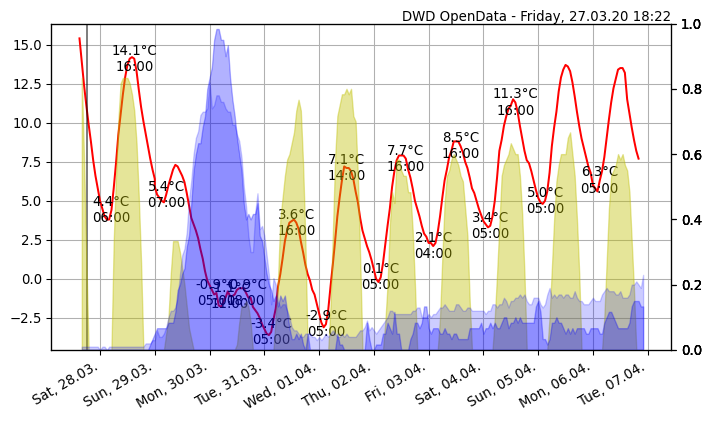

In [13]:
wp.plot("10865",image_file='weather.png')
Image('weather.png')

In [14]:
from ipyleaflet import Map, Marker, MarkerCluster, AwesomeIcon

In [15]:
icon_home = AwesomeIcon(
    name='home',
    marker_color='blue',
    icon_color='black',
    spin=False
)
icon_station = AwesomeIcon(
    name = 'thermometer-4',
    marker_color='blue',
    icon_color='black',
    spin=False
)


In [17]:
home=(my_lat,my_lon)
center=(min(sl['Breite'])+(max(sl['Breite'])-min(sl['Breite']))/2, min(sl['Länge'])+(max(sl['Länge'])-min(sl['Länge']))/2)
m=Map(center=center, zoom=8)

In [18]:
marker = Marker(location=home, icon=icon_home, draggable=False, title="DWD weather station")
m.add_layer(marker);

display(m)

Map(center=[51.141000000000005, 10.469999999999999], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [19]:
min(sl['Breite'])

47.271

In [20]:
max(sl['Breite'])

55.011

In [21]:
import pandas as pd

In [22]:
stations=[]
for i in range(len(sl)):
    if d._is_uptodate(i) is True:
        stations.append((sl['Breite'][i], sl['Länge'][i], sl['Stationsname'][i], sl['Kennung'][i], sl['Stations-kennung'][i], sl['Ende'][i]))

In [23]:
len(stations)

5895

In [24]:
len(sl)

18675

In [25]:
import time
import datetime

In [26]:
stations[:10]

[(50.75, 6.186, 'Aachen-Brand (WV NRW)', 'MN', 'H808', '25.03.2020'),
 (50.75, 6.186, 'Aachen-Brand (WV NRW)', 'RR', '87411', '24.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'EB', '02206', '24.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'FF', '02206', '24.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'KL', '02206', '24.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'MN', '10505', '25.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'RR', '80311', '24.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'SO', '02206', '24.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'SY', '10505', '24.03.2020'),
 (50.798, 6.024, 'Aachen-Orsbach', 'TU', '02206', '24.03.2020')]

In [27]:
dt=(datetime.datetime.now()-sl['EndeDT'][3]).total_seconds()

In [28]:
from urllib.request import urlopen

In [29]:
def get_forecast_stations():
    url='https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_L/single_stations'
    try:
        resp=urlopen(url)
        data=resp.read()
    except Exception as e:
        logging.error(f"Failed to download {url}: {e}")
        return None
    return data

In [30]:
data=get_forecast_stations()

In [31]:
from bs4 import BeautifulSoup

In [32]:
soup = BeautifulSoup(data, 'html.parser')
raw_stations = []
for a in soup.find_all('a', href=True): 
    if a.text: 
        raw_stations.append(a['href'][:-1])
raw_stations=raw_stations[1:]

In [33]:
raw_stations[:10]

['01001',
 '01008',
 '01025',
 '01028',
 '01049',
 '01052',
 '01059',
 '01089',
 '01092',
 '01112']

In [34]:
len(raw_stations)

5899

In [35]:
val_stations=[]
for i in range(len(sl)):
    val_stations.append(sl['Stations-kennung'][i])

In [36]:
len(val_stations), len(raw_stations)

(18675, 5899)

In [37]:
vir=[]
riv=[]
for i in range(len(val_stations)):
    if val_stations[i] in raw_stations:
        if val_stations[i] not in vir:
            vir.append(val_stations[i])
for i in range(len(raw_stations)):
    if raw_stations[i] in val_stations:
        riv.append(raw_stations[i])
vir=sorted(vir)
riv=sorted(riv)

In [38]:
len(vir), len(riv)

(1750, 1750)

In [39]:
markers=[]
done=[]
for i in range(len(sl)):
    kenn=sl['Stations-kennung'][i]
    name=sl['Stationsname'][i]
    if (kenn in vir) and (name not in done):
        done.append(name)
        marker = Marker(location=(sl['Breite'][i], sl['Länge'][i]), icon=icon_station, draggable=False, title=f"{name}, id={kenn}")
        markers.append(marker)

In [40]:
len(markers)

1965

In [41]:
marker_cluster = MarkerCluster(
    markers=markers
)

In [42]:
m.add_layer(marker_cluster)

In [43]:
m

Map(center=[51.141000000000005, 10.469999999999999], controls=(ZoomControl(options=['position', 'zoom_in_text'…